In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | goderich
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | camana
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | dauphin
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | raudeberg
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | raton
Processing Record

Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | phek
Processing Record 42 of Set 4 | kongsberg
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | baculin
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | jiayuguan
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | utiroa
City not found. Skipping...
Processing Record 50 of Set 4 | ola
Processing Record 1 of Set 5 | neverkino
Processing Record 2 of Set 5 | toliary
City not found. Skipping...
Processing Record 3 of Set 5 | kattivakkam
Processing Record 4 of Set 5 | ekhabi
Processing Record 5 of Set 5 | damietta
Processing Record 6 of Set 5 | nichinan
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | ranong
Processing Record 9 of Set 5 | chapais
Processing Record 10 of Set 5 | laguna
Processing Record 11 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 5

Processing Record 31 of Set 8 | poroshkovo
Processing Record 32 of Set 8 | utiel
Processing Record 33 of Set 8 | balkanabat
Processing Record 34 of Set 8 | kiunga
Processing Record 35 of Set 8 | saint anthony
Processing Record 36 of Set 8 | eyl
Processing Record 37 of Set 8 | sungairaya
Processing Record 38 of Set 8 | solotcha
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | sai buri
Processing Record 43 of Set 8 | serabu
Processing Record 44 of Set 8 | aitape
Processing Record 45 of Set 8 | haines junction
Processing Record 46 of Set 8 | valdivia
Processing Record 47 of Set 8 | fare
Processing Record 48 of Set 8 | xining
Processing Record 49 of Set 8 | gleisdorf
Processing Record 50 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 1 of Set 9 | pangoa
Processing Record 2 of Set 9 | middelburg
Processing Record 3 of Set 9 | newport
Processing Record 4 of Set 9 | tevri

Processing Record 19 of Set 12 | princeton
Processing Record 20 of Set 12 | kudahuvadhoo
Processing Record 21 of Set 12 | sechura
Processing Record 22 of Set 12 | atar
Processing Record 23 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 24 of Set 12 | chicama
Processing Record 25 of Set 12 | toyooka
Processing Record 26 of Set 12 | pauini
Processing Record 27 of Set 12 | maua
Processing Record 28 of Set 12 | albanel
Processing Record 29 of Set 12 | aasiaat
Processing Record 30 of Set 12 | palmer
Processing Record 31 of Set 12 | kushiro
Processing Record 32 of Set 12 | vung tau
Processing Record 33 of Set 12 | saravan
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | quartucciu
Processing Record 36 of Set 12 | siuna
Processing Record 37 of Set 12 | bubaque
Processing Record 38 of Set 12 | karpathos
Processing Record 39 of Set 12 | sitka
Processing Record 40 of Set 12 | sibolga
Processing Record 41 of Set 12 | mendi
Processing Record 42 of Set 12 

In [9]:
len(city_data)

583

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,53.42,84,9,9.69,NO,2021-07-05 22:56:45
1,Togur,58.3631,82.8265,61.57,97,22,9.86,RU,2021-07-05 22:56:45
2,Fortuna,40.5982,-124.1573,70.86,79,40,3.00,US,2021-07-05 22:56:46
3,Viseu,40.6610,-7.9097,63.86,96,100,5.82,PT,2021-07-05 22:56:46
4,Arraial Do Cabo,-22.9661,-42.0278,68.58,68,31,8.61,BR,2021-07-05 22:56:46
5,Onokhoy,51.9320,108.0747,62.35,52,9,2.21,RU,2021-07-05 22:56:47
6,Ostrovnoy,68.0531,39.5131,62.56,74,12,22.59,RU,2021-07-05 22:56:47
7,Ortigueira,-24.2083,-50.9494,54.37,80,8,1.21,BR,2021-07-05 22:56:47
8,Tasiilaq,65.6145,-37.6368,38.35,85,93,4.56,GL,2021-07-05 22:56:47
9,Chokurdakh,70.6333,147.9167,45.75,80,100,15.23,RU,2021-07-05 22:56:48


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
4,Arraial Do Cabo,BR,2021-07-05 22:56:46,-22.9661,-42.0278,68.58,68,31,8.61
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21
6,Ostrovnoy,RU,2021-07-05 22:56:47,68.0531,39.5131,62.56,74,12,22.59
7,Ortigueira,BR,2021-07-05 22:56:47,-24.2083,-50.9494,54.37,80,8,1.21
8,Tasiilaq,GL,2021-07-05 22:56:47,65.6145,-37.6368,38.35,85,93,4.56
9,Chokurdakh,RU,2021-07-05 22:56:48,70.6333,147.9167,45.75,80,100,15.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
4,Arraial Do Cabo,BR,2021-07-05 22:56:46,-22.9661,-42.0278,68.58,68,31,8.61
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21
6,Ostrovnoy,RU,2021-07-05 22:56:47,68.0531,39.5131,62.56,74,12,22.59
7,Ortigueira,BR,2021-07-05 22:56:47,-24.2083,-50.9494,54.37,80,8,1.21
8,Tasiilaq,GL,2021-07-05 22:56:47,65.6145,-37.6368,38.35,85,93,4.56
9,Chokurdakh,RU,2021-07-05 22:56:48,70.6333,147.9167,45.75,80,100,15.23


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

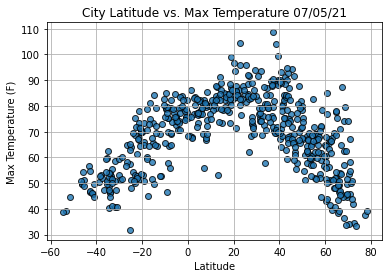

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

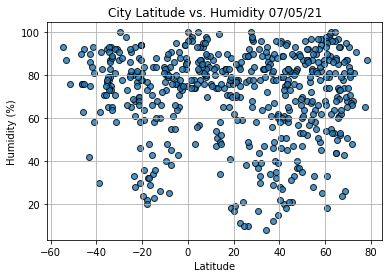

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

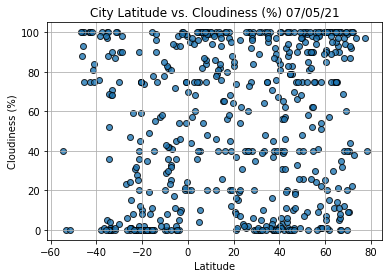

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

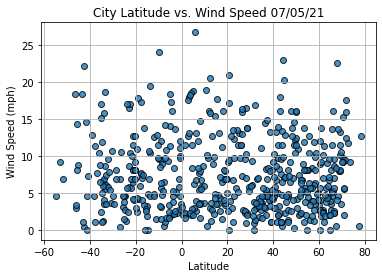

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [67]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Country                        AU
Date          2021-07-05 22:56:49
Lat                      -24.8667
Lng                      113.6333
Max Temp                    48.27
Humidity                       65
Cloudiness                      1
Wind Speed                   4.61
Name: 13, dtype: object

In [68]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21
...,...,...,...,...,...,...,...,...,...
533,Tessalit,ML,2021-07-05 22:59:19,20.1986,1.0114,96.66,17,85,2.62
534,North Bend,US,2021-07-05 22:59:19,43.4065,-124.2243,78.24,76,6,1.01
535,Mahibadhoo,MV,2021-07-05 22:59:20,3.7833,72.9667,82.89,76,100,18.28
541,Luan,CH,2021-07-05 22:59:21,46.3592,6.9759,59.04,80,0,1.01


In [69]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

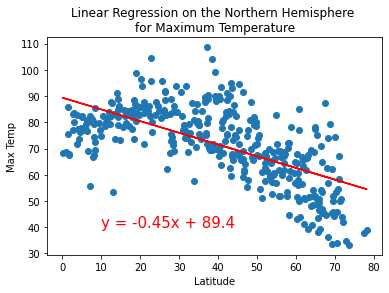

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

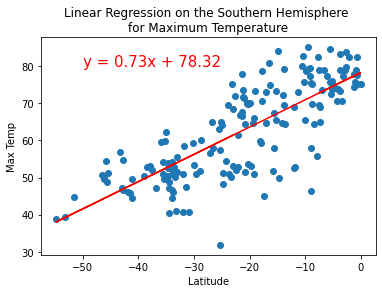

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

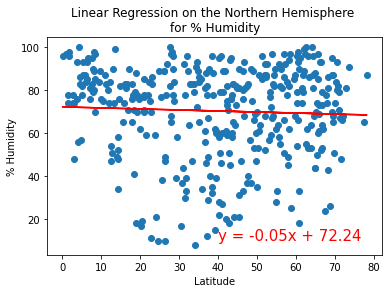

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

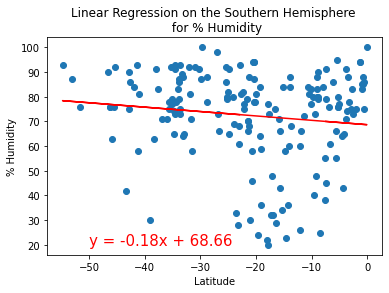

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

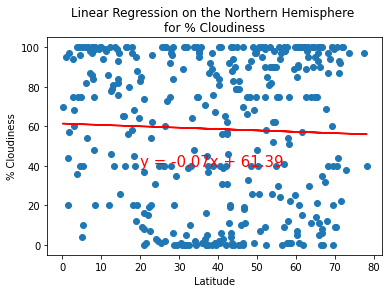

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(20,40))

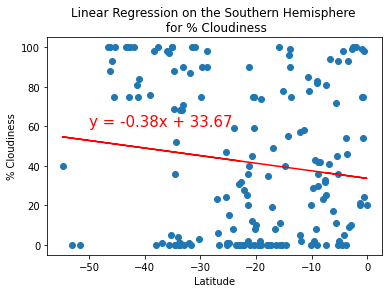

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

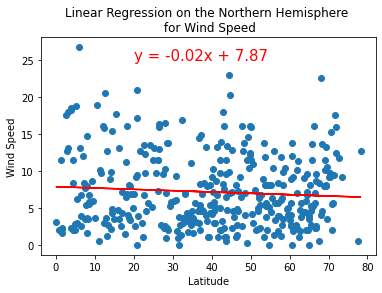

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,25))

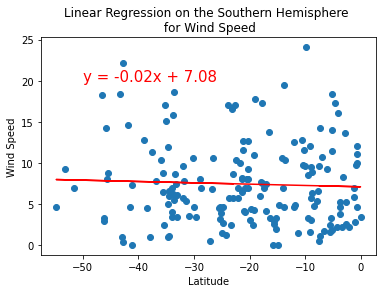

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))